# $$ TASK 1 $$
# $$Spam Detection$$
"


## $$ 1. Data Loading & Preprocessing: $$


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [73]:
#loading
data = pd.read_csv('Task_1.csv')
print(data.head())

# preprocessing
def preprocess_text(text):
    text = text.lower()  # Lowercase convert
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

data['text'] = data['text'].apply(preprocess_text)

# Check for missing values
print(data.isnull().sum())

  labels                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...
labels    0
text      0
dtype: int64


## $$ 2. Feature Extraction & :$$


In [74]:
# Encode labeling.
data['labels'] = data['labels'].map({'ham': 0, 'spam': 1})

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['labels'], test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_num = vectorizer.fit_transform(X_train)
X_test_num = vectorizer.transform(X_test)


## $$ 3. Model Training & Evaluation :$$


Accuracy: 0.972488038277512


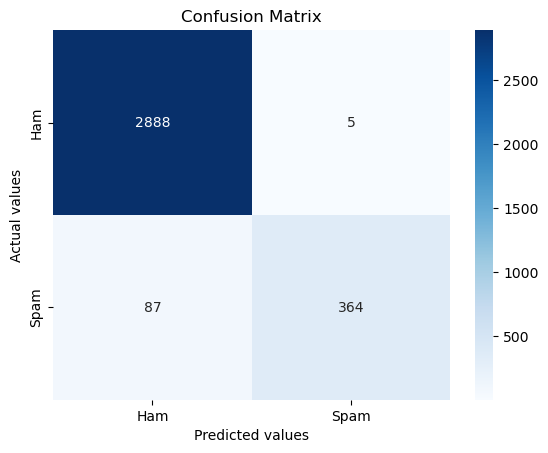

In [75]:
# Fitting Logistic Regression
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_num, y_train)

y_pred = model.predict(X_test_num)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# confusion matrix
%matplotlib inline
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

## $$ 4. Hyperparameter Tuning & re-valuation :$$


Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model Accuracy: 0.9859449760765551


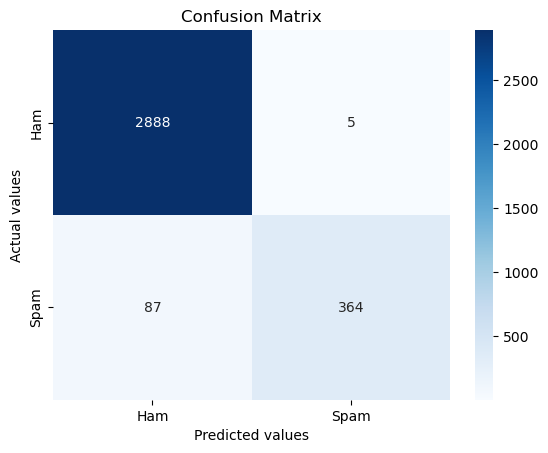

In [77]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2']
    }
    
# Initialize GridSearchCV
grid = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_num, y_train)

# Get the best parameters
print(f'Best parameters: {grid.best_params_}')
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_num)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {best_accuracy}')

# confusion matrix
%matplotlib inline
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()